In [296]:
import gdown
gdown.download_folder('https://drive.google.com/drive/folders/1fBs3klrABIbNxvReGZ96lLdOnLTRYEZ5?usp=sharing')

Retrieving folder list


Processing file 1-Dde_F8ttW9Z02W1o_sBipRlFjNCGAiR taxi-rides-classification.csv
Processing file 1-GOIgH2uvntppatU59m8U0pwHF8v4HFC weather.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1-Dde_F8ttW9Z02W1o_sBipRlFjNCGAiR
To: /content/classification/taxi-rides-classification.csv
100%|██████████| 72.8M/72.8M [00:00<00:00, 226MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-GOIgH2uvntppatU59m8U0pwHF8v4HFC
To: /content/classification/weather.csv
100%|██████████| 350k/350k [00:00<00:00, 52.1MB/s]
Download completed


['/content/classification/taxi-rides-classification.csv',
 '/content/classification/weather.csv']

In [297]:
!curl --remote-name https://raw.githubusercontent.com/aymanmostafa11/Taxi-Ride-Fare-Prediction/main/helpers.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6142  100  6142    0     0  84136      0 --:--:-- --:--:-- --:--:-- 84136


In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from helpers import Model , PreProcessing

In [299]:
RANDOM_STATE = 42

In [300]:
dataPath = '/content/classification'

In [301]:
taxiRides = pd.read_csv(dataPath + '/taxi-rides-classification.csv')
weather = pd.read_csv(dataPath + '/weather.csv')

In [302]:
print(f"Taxi Rides has {taxiRides.shape[0]} Rows and {taxiRides.shape[1]} Columns")
taxiRides.head()

Taxi Rides has 554456 Rows and 10 Columns


,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,RideCategory
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap


In [303]:
print(f"Weather has {weather.shape[0]} Rows and {weather.shape[1]} Columns")
weather.head()

Weather has 6276 Rows and 8 Columns


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


# Data Cleaning

## Taxi Rides

In [304]:
taxiRides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554456 non-null  float64
 1   cab_type          554456 non-null  object 
 2   time_stamp        554456 non-null  float64
 3   destination       554456 non-null  object 
 4   source            554456 non-null  object 
 5   surge_multiplier  554456 non-null  float64
 6   id                554456 non-null  object 
 7   product_id        554456 non-null  object 
 8   name              554456 non-null  object 
 9   RideCategory      554456 non-null  object 
dtypes: float64(3), object(7)
memory usage: 42.3+ MB


## Null

In [305]:
print("Null Values in columns")
taxiRides.isnull().sum()

Null Values in columns


distance            0
cab_type            0
time_stamp          0
destination         0
source              0
surge_multiplier    0
id                  0
product_id          0
name                0
RideCategory        0
dtype: int64

In [306]:
weather['rain'].fillna(0,inplace=True)

## product_id and name

In [307]:
print(f"Value counts of 'product_id' feature\n")
taxiRides['product_id'].value_counts()

Value counts of 'product_id' feature



55c66225-fbe7-4fd5-9072-eab1ece5e23e    44204
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    44135
997acbb5-e102-41e1-b155-9df7de0a73f2    44108
6d318bcc-22a3-4af6-bddd-b409bfce1546    44038
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    44024
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43983
6c84fd89-3f11-4782-9b50-97c468b19529    43977
lyft_plus                               41142
lyft_lux                                41041
lyft                                    41015
lyft_luxsuv                             40979
lyft_premier                            40969
lyft_line                               40841
Name: product_id, dtype: int64

In [308]:
print(f"Value counts of 'name' feature\n")
taxiRides['name'].value_counts()

Value counts of 'name' feature



UberX           44204
Taxi            44135
UberPool        44108
Black SUV       44038
WAV             44024
UberXL          43983
Black           43977
Lyft XL         41142
Lux Black       41041
Lyft            41015
Lux Black XL    40979
Lux             40969
Shared          40841
Name: name, dtype: int64

product_id and name represent the same feature so we can drop one of them

## Encoding Timestamps to date

In [309]:
weatherDate = pd.to_datetime(weather['time_stamp'], unit='s').apply(lambda x: x.strftime(('%Y-%m-%d')))
taxiRidesDate = pd.to_datetime(taxiRides['time_stamp'], unit='ms').apply(lambda x: x.strftime(('%Y-%m-%d')))
weather['date'] = weatherDate
taxiRides['date'] = taxiRidesDate

In [310]:
taxiRides.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,RideCategory,date
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown,2018-12-14
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap,2018-11-28
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate,2018-12-16
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive,2018-11-30
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap,2018-11-30


In [311]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16


In [312]:
taxiRides['date'].value_counts()

2018-11-27    63256
2018-11-29    53128
2018-11-28    52087
2018-12-14    37608
2018-11-30    37608
2018-12-02    37547
2018-12-17    37540
2018-12-16    37423
2018-12-03    37409
2018-12-01    33387
2018-12-15    33255
2018-12-13    30590
2018-12-18    27281
2018-11-26    24021
2018-12-04     8750
2018-12-10     3566
Name: date, dtype: int64

In [313]:
weather['date'].value_counts()

2018-11-28    948
2018-11-26    852
2018-11-29    768
2018-11-27    684
2018-12-01    324
2018-11-30    300
2018-12-16    288
2018-12-14    288
2018-12-03    288
2018-12-15    288
2018-12-17    288
2018-12-02    288
2018-12-13    276
2018-12-18    228
2018-12-10     72
2018-12-04     72
2018-12-09     24
Name: date, dtype: int64

In [314]:
## Joining Dataframes based on date

taxiRides.drop(['time_stamp'],axis = 1, inplace = True)
weather.drop(['time_stamp'],axis = 1, inplace = True)
#
mergedData = pd.merge(taxiRides,weather.drop_duplicates(subset=['date', 'location']), how = 'left', left_on=['date', 'source'], right_on=['date', 'location'])

In [315]:
mergedData.isnull().sum()

distance            0
cab_type            0
destination         0
source              0
surge_multiplier    0
id                  0
product_id          0
name                0
RideCategory        0
date                0
temp                0
location            0
clouds              0
pressure            0
rain                0
humidity            0
wind                0
dtype: int64

## Rain Feature

Rows with null rain value statistics
Rows with non-null rain value statistics
Values of 0 in the rain feature 5382


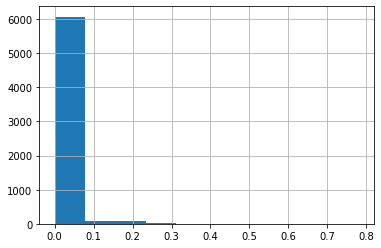

In [316]:
weather['rain'].isnull().sum() / weather['rain'].shape[0]
weather['rain'].hist()
#Does null values of rain revolve around certain values?
print("Rows with null rain value statistics")
weather[weather['rain'].isnull()].describe()

print("Rows with non-null rain value statistics")
weather[weather['rain'].notna()].describe()

weather['rain'].value_counts()

print(f"Values of 0 in the rain feature {(weather['rain'] == 0).sum()}")
#Rain feature nulls could indicate no rain


# Data Visualization

In [317]:
# plt.figure(figsize = (8, 8))
# plt.xticks(rotation = 60)
# plt.yticks(rotation = 60)
# plt.title('Correlation of data features')
# sns.heatmap(taxiRides.corr(), annot = True)
# plt.show()

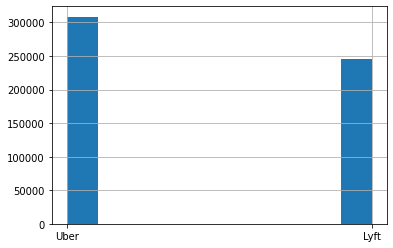

In [318]:
taxiRides['cab_type'].hist()
plt.show()

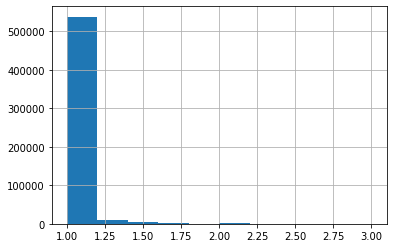

In [319]:
taxiRides['surge_multiplier'].hist()

# Preprocessing

In [320]:
mergedData.head()

,distance,cab_type,destination,source,surge_multiplier,id,product_id,name,RideCategory,date,temp,location,clouds,pressure,rain,humidity,wind
0,0.62,Uber,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,unknown,2018-12-14,27.34,Haymarket Square,0.15,1033.40,0.0000,0.81,3.04
1,2.27,Uber,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,cheap,2018-11-28,33.67,Beacon Hill,0.12,991.20,0.0000,0.82,5.37
2,2.00,Lyft,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,moderate,2018-12-16,42.34,Haymarket Square,1.00,1012.15,0.2068,0.77,11.49
3,3.98,Lyft,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,expensive,2018-11-30,38.46,Northeastern University,0.96,1017.24,0.0000,0.66,3.31
4,1.49,Lyft,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,cheap,2018-11-30,38.46,Northeastern University,0.96,1017.24,0.0000,0.66,3.31


In [321]:
preProcessing = PreProcessing()

In [322]:
columnsToDrop = ['id', 'date', 'product_id']

In [323]:
mergedData.drop(columnsToDrop,axis = 1,inplace=True)

In [324]:
mergedData.head()

,distance,cab_type,destination,source,surge_multiplier,name,RideCategory,temp,location,clouds,pressure,rain,humidity,wind
0,0.62,Uber,West End,Haymarket Square,1.0,Taxi,unknown,27.34,Haymarket Square,0.15,1033.40,0.0000,0.81,3.04
1,2.27,Uber,Boston University,Beacon Hill,1.0,UberPool,cheap,33.67,Beacon Hill,0.12,991.20,0.0000,0.82,5.37
2,2.00,Lyft,Back Bay,Haymarket Square,1.0,Lyft,moderate,42.34,Haymarket Square,1.00,1012.15,0.2068,0.77,11.49
3,3.98,Lyft,Financial District,Northeastern University,1.0,Lyft XL,expensive,38.46,Northeastern University,0.96,1017.24,0.0000,0.66,3.31
4,1.49,Lyft,Back Bay,Northeastern University,1.0,Lyft,cheap,38.46,Northeastern University,0.96,1017.24,0.0000,0.66,3.31


In [325]:
mergedData.isnull().sum()

distance            0
cab_type            0
destination         0
source              0
surge_multiplier    0
name                0
RideCategory        0
temp                0
location            0
clouds              0
pressure            0
rain                0
humidity            0
wind                0
dtype: int64

## Encoding

###  <i>name</i> Feature

In [326]:
preProcessing.encode_name(mergedData['name'])

### Other Features

In [327]:
nonIntegerColumns = [col for col in mergedData.columns if mergedData[col].dtypes == object]
print(f"Non Integer Columns : {nonIntegerColumns}")

Non Integer Columns : ['cab_type', 'destination', 'source', 'RideCategory', 'location']


In [328]:
preProcessing.encode(mergedData,nonIntegerColumns)

In [329]:
mergedData.head()

,distance,cab_type,destination,source,surge_multiplier,name,RideCategory,temp,location,clouds,pressure,rain,humidity,wind
0,0.62,1,11,5,1.0,1,3,27.34,5,0.15,1033.40,0.0000,0.81,3.04
1,2.27,1,2,1,1.0,1,0,33.67,1,0.12,991.20,0.0000,0.82,5.37
2,2.00,0,0,5,1.0,1,2,42.34,5,1.00,1012.15,0.2068,0.77,11.49
3,3.98,0,4,8,1.0,2,1,38.46,8,0.96,1017.24,0.0000,0.66,3.31
4,1.49,0,0,8,1.0,1,0,38.46,8,0.96,1017.24,0.0000,0.66,3.31


### Rain Feature Engineering

In [330]:
mergedData['rain'].describe()

count    554456.000000
mean          0.011511
std           0.039021
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.208800
Name: rain, dtype: float64

Referring to google:
<blockquote>Light rainfall is considered <b>less than 0.10 inches</b> of rain per hour. Moderate rainfall measures <b>0.10 to 0.30 inches</b> of rain per hour. Heavy rainfall is more than <b>0.30 inches</b>
 of rain per hour.</blockquote>
0 : no rain <br>
1 : light rain <br>
2 : mid rain <br>
3 : heavy rain (doesn't exist in the data)

In [331]:
mergedData['rainType'] = 0

In [332]:
mergedData['rainType'][(mergedData['rain'] > 0) & (mergedData['rain'] < 0.1)] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [333]:
mergedData['rainType'][(mergedData['rain'] > 0.1) & (mergedData['rain'] < 0.3)] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [334]:
mergedData['rainType'].value_counts()

0    480515
1     42966
2     30975
Name: rainType, dtype: int64

## Clouds engineering
making the assumption that clouds are on normalized [Okta Scale](https://polarpedia.eu/en/okta-scale/) that means values less than 0.1 are sunny days

In [335]:
mergedData['sunnyDay'] = 0

In [336]:
mergedData['sunnyDay'][mergedData['clouds'] <= 0.1] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [337]:
mergedData['sunnyDay'].value_counts()

0    546501
1      7955
Name: sunnyDay, dtype: int64

### Correlation Before PCA

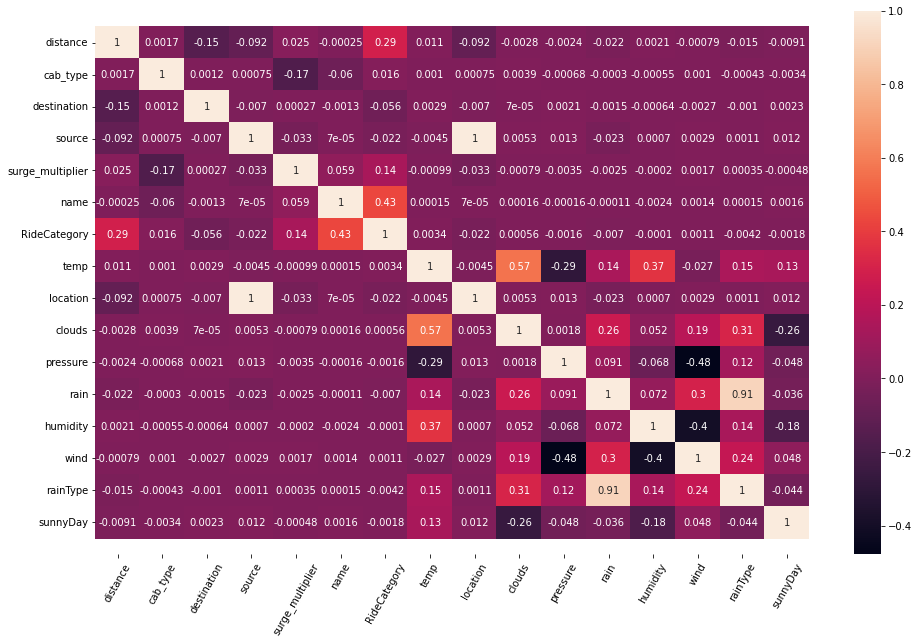

In [338]:
plt.figure(figsize = (16, 10))

ax = sns.heatmap(mergedData.corr(), annot = True)
ax.tick_params(axis = 'x', rotation = 60)
ax.tick_params(axis = 'y', rotation = 0)
# these two lines are meant to fix a bug in matplotlib's current version
# where the graph top and bot rows are cut in half (I copied them from stackoverflow)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

### Dimentionality Reduction

In [339]:
subsetOfData = mergedData[['temp','sunnyDay','rainType','wind','pressure','humidity']]
mergedData.drop(['temp','clouds','sunnyDay','rainType','rain','wind','pressure','humidity'],axis=1,inplace=True)

In [340]:
lowerDimensionWeatherData =preProcessing.reduceDimentionsOf(subsetOfData)
mergedData['weatherState'] = lowerDimensionWeatherData

### Correlation Before PCA

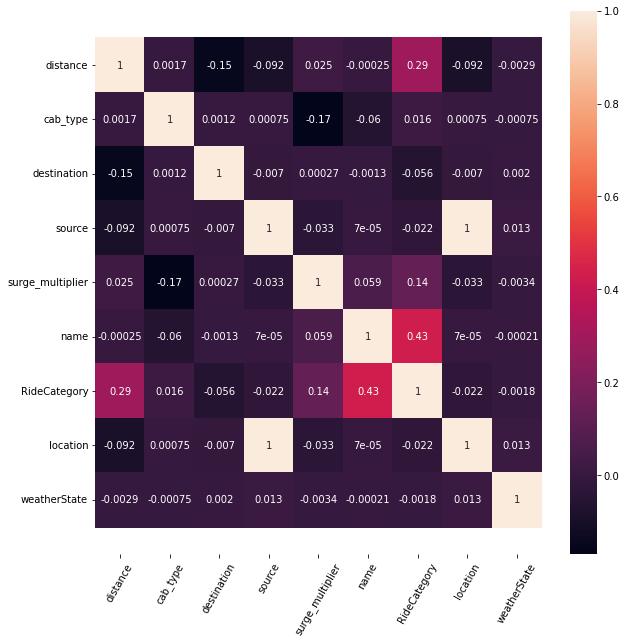

In [341]:
plt.figure(figsize = (10, 10))

ax = sns.heatmap(mergedData.corr(), annot = True)
ax.tick_params(axis = 'x', rotation = 60)
ax.tick_params(axis = 'y', rotation = 0)
# these two lines are meant to fix a bug in matplotlib's current version
# where the graph top and bot rows are cut in half (I copied them from stackoverflow)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

# Model

In [342]:
dataFeatures = mergedData.drop(['RideCategory'],axis=1)
dataLabel = mergedData['RideCategory']

In [343]:
dataFeatures.head()

,distance,cab_type,destination,source,surge_multiplier,name,location,weatherState
0,0.62,1,11,5,1.0,1,5,26.134730
1,2.27,1,2,1,1.0,1,1,-16.492402
2,2.00,0,0,5,1.0,1,5,2.092880
3,3.98,0,4,8,1.0,2,8,8.657758
4,1.49,0,0,8,1.0,1,8,8.657758


In [344]:
model = Model()

In [345]:
splitData = model.splitData(dataFeatures,dataLabel)

### Linear Logistic

In [346]:
lr = linear_model.LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state=RANDOM_STATE)
lr.fit(splitData['trainFeatures'], splitData['trainLabel'])
print(lr.score(splitData['trainFeatures'], splitData['trainLabel']))
metrics.f1_score(splitData['testLabel'], lr.predict(splitData['testFeatures']),average='micro')

0.7300569929029407


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7309093532445984

### Polynomial Logistic

In [347]:
#polyDegree = 2

In [348]:
#polyFeaturesTrain  = model.changeDegreeOf(splitData['trainFeatures'], polyDegree)
#polyFeaturesValidation = model.changeDegreeOf(splitData['testFeatures'], polyDegree)

In [349]:
#lr = linear_model.LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state=RANDOM_STATE)
#lr.fit(polyFeaturesTrain, splitData['trainLabel'])

In [350]:
#print(lr.score(polyFeaturesTrain, splitData['trainLabel']))
#metrics.f1_score(splitData['testLabel'], lr.predict(polyFeaturesValidation),average='micro')

### Decision Tree

In [351]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE)
tree.fit(splitData['trainFeatures'], splitData['trainLabel'])
print(tree.score(splitData['trainFeatures'], splitData['trainLabel']))
metrics.f1_score(splitData['testLabel'], tree.predict(splitData['testFeatures']),average='micro')

0.8332889955000856


0.7896151210186487

### Random Forest

In [352]:
forest = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
forest.fit(splitData['trainFeatures'], splitData['trainLabel'])
print(forest.score(splitData['trainFeatures'], splitData['trainLabel']))
metrics.f1_score(splitData['testLabel'], forest.predict(splitData['testFeatures']),average='micro')

0.833277723169599


0.7922032247592252

### SVM

In [353]:
#svm = SVC( C = 10,random_state = RANDOM_STATE)
#svm.fit(splitData['trainFeatures'], splitData['trainLabel'])
#print(svm.score(splitData['trainFeatures'], splitData['trainLabel']))
#metrics.f1_score(splitData['testLabel'], svm.predict(splitData['testFeatures']),average='micro')